In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("FinancialHealthAnalysis") \
    .getOrCreate()

print("✅ Spark Session Created Successfully!")


✅ Spark Session Created Successfully!


In [86]:
file_path = "AMC D49-FinancialHealth.csv"  # Update path if needed

df = spark.read.csv(file_path, header=True, inferSchema=True)
print("✅ Dataset Loaded Successfully!")


✅ Dataset Loaded Successfully!


In [6]:
df.printSchema()
df.show(5)


root
 |-- City Name: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Municipal's Revenue: double (nullable = true)
 |-- Municipal's Expenditure: double (nullable = true)
 |-- Total Profit / Loss: double (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)
 |-- _c12: string (nullable = true)
 |-- _c13: string (nullable = true)
 |-- _c14: string (nullable = true)
 |-- _c15: string (nullable = true)
 |-- _c16: string (nullable = true)
 |-- _c17: string (nullable = true)
 |-- _c18: string (nullable = true)
 |-- _c19: string (nullable = true)
 |-- _c20: string (nullable = true)
 |-- _c21: string (nullable = true)

+---------+-------+-------------------+-----------------------+-------------------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+

In [8]:
# Number of rows and columns
print("Number of rows:", df.count())
print("Number of columns:", len(df.columns))

# Column names
print("Columns:", df.columns)


Number of rows: 959
Number of columns: 22
Columns: ['City Name', 'Year', "Municipal's Revenue", "Municipal's Expenditure", 'Total Profit / Loss', '_c5', '_c6', '_c7', '_c8', '_c9', '_c10', '_c11', '_c12', '_c13', '_c14', '_c15', '_c16', '_c17', '_c18', '_c19', '_c20', '_c21']


In [10]:
df.describe().show()


+-------+---------+-------+-------------------+-----------------------+-------------------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|summary|City Name|   Year|Municipal's Revenue|Municipal's Expenditure|Total Profit / Loss| _c5| _c6| _c7| _c8| _c9|_c10|_c11|_c12|_c13|_c14|_c15|_c16|_c17|_c18|_c19|_c20|_c21|
+-------+---------+-------+-------------------+-----------------------+-------------------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|  count|        4|      4|                  4|                      4|                  4|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|
|   mean|     NULL|   NULL| 14773.930000000002|             11744.8325| 3029.0975000000003|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|
| stddev|     NULL|   NULL|  3988.735439618261|     3287.2544579164633|  1874.718094796744|NULL|NULL|NULL|NULL|NULL

In [12]:
from pyspark.sql.functions import col, when, count, isnan

df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()


+---------+----+-------------------+-----------------------+-------------------+---+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+
|City Name|Year|Municipal's Revenue|Municipal's Expenditure|Total Profit / Loss|_c5|_c6|_c7|_c8|_c9|_c10|_c11|_c12|_c13|_c14|_c15|_c16|_c17|_c18|_c19|_c20|_c21|
+---------+----+-------------------+-----------------------+-------------------+---+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+
|      955| 955|                955|                    955|                955|959|959|959|959|959| 959| 959| 959| 959| 959| 959| 959| 959| 959| 959| 959| 959|
+---------+----+-------------------+-----------------------+-------------------+---+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+



In [14]:
df_clean = df.dropna()
print("✅ Null values dropped. Clean dataset ready.")


✅ Null values dropped. Clean dataset ready.


In [18]:
df.select("City Name", "Municipal's Revenue", "Total Profit / Loss").show(5)


+---------+-------------------+-------------------+
|City Name|Municipal's Revenue|Total Profit / Loss|
+---------+-------------------+-------------------+
|    Ajmer|           17352.86|            1661.73|
|    Ajmer|           18833.88|             5668.3|
|    Ajmer|           12585.55|            3063.94|
|    Ajmer|           10323.43|            1722.42|
|     NULL|               NULL|               NULL|
+---------+-------------------+-------------------+
only showing top 5 rows


In [20]:
df.filter(col("Total Profit / Loss") > 1000).show(5)


+---------+-------+-------------------+-----------------------+-------------------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|City Name|   Year|Municipal's Revenue|Municipal's Expenditure|Total Profit / Loss| _c5| _c6| _c7| _c8| _c9|_c10|_c11|_c12|_c13|_c14|_c15|_c16|_c17|_c18|_c19|_c20|_c21|
+---------+-------+-------------------+-----------------------+-------------------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|    Ajmer|2017-18|           17352.86|               15691.13|            1661.73|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|
|    Ajmer|2016-17|           18833.88|               13165.58|             5668.3|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|
|    Ajmer|2015-16|           12585.55|                9521.61|            3063.94|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NU

In [22]:
from pyspark.sql.functions import col

df = df.withColumn("Profit_Margin", (col("Total Profit / Loss") / col("Municipal's Revenue")) * 100)
df.select("City Name", "Municipal's Revenue", "Total Profit / Loss", "Profit_Margin").show(5)


+---------+-------------------+-------------------+------------------+
|City Name|Municipal's Revenue|Total Profit / Loss|     Profit_Margin|
+---------+-------------------+-------------------+------------------+
|    Ajmer|           17352.86|            1661.73| 9.576115983186632|
|    Ajmer|           18833.88|             5668.3|30.096294550034298|
|    Ajmer|           12585.55|            3063.94| 24.34490348057892|
|    Ajmer|           10323.43|            1722.42| 16.68457092264877|
|     NULL|               NULL|               NULL|              NULL|
+---------+-------------------+-------------------+------------------+
only showing top 5 rows


In [24]:
df.groupBy("City Name").agg({"Total Profit / Loss": "sum"}).orderBy("sum(Total Profit / Loss)", ascending=False).show()


+---------+------------------------+
|City Name|sum(Total Profit / Loss)|
+---------+------------------------+
|    Ajmer|      12116.390000000001|
|     NULL|                    NULL|
+---------+------------------------+



In [26]:
df.groupBy("Year").agg({"Municipal's Revenue": "avg"}).orderBy("Year").show()


+-------+------------------------+
|   Year|avg(Municipal's Revenue)|
+-------+------------------------+
|   NULL|                    NULL|
|2014-15|                10323.43|
|2015-16|                12585.55|
|2016-17|                18833.88|
|2017-18|                17352.86|
+-------+------------------------+



In [64]:
df.groupBy("Year") \
  .agg({"Municipal's Expenditure": "sum"}) \
  .orderBy("Year") \
  .show()


+-------+----------------------------+
|   Year|sum(Municipal's Expenditure)|
+-------+----------------------------+
|   NULL|                        NULL|
|2014-15|                     8601.01|
|2015-16|                     9521.61|
|2016-17|                    13165.58|
|2017-18|                    15691.13|
+-------+----------------------------+



In [66]:
df.groupBy("Year") \
  .agg({"Total Profit / Loss": "sum"}) \
  .orderBy("Year") \
  .show()


+-------+------------------------+
|   Year|sum(Total Profit / Loss)|
+-------+------------------------+
|   NULL|                    NULL|
|2014-15|                 1722.42|
|2015-16|                 3063.94|
|2016-17|                  5668.3|
|2017-18|                 1661.73|
+-------+------------------------+



In [76]:
from pyspark.sql import functions as F
from pyspark.sql.window import Window

# Rename column to remove special character
df = df.withColumnRenamed("Municipal's Revenue", "Municipal_Revenue")

# Compute total revenue per year
revenue_yearly = df.groupBy("Year").agg(F.sum("Municipal_Revenue").alias("Total_Revenue")).orderBy("Year")

# Define window for previous year
windowSpec = Window.orderBy("Year")

# Add previous year revenue
revenue_growth = revenue_yearly.withColumn("Prev_Revenue", F.lag("Total_Revenue").over(windowSpec))

# Calculate growth percentage
revenue_growth = revenue_growth.withColumn(
    "Revenue_Growth(%)",
    ((F.col("Total_Revenue") - F.col("Prev_Revenue")) / F.col("Prev_Revenue")) * 100
)

revenue_growth.show()

+-------+-------------+------------+------------------+
|   Year|Total_Revenue|Prev_Revenue| Revenue_Growth(%)|
+-------+-------------+------------+------------------+
|   NULL|         NULL|        NULL|              NULL|
|2014-15|     10323.43|        NULL|              NULL|
|2015-16|     12585.55|    10323.43|21.912484513383625|
|2016-17|     18833.88|    12585.55| 49.64685691129909|
|2017-18|     17352.86|    18833.88|-7.863594755833637|
+-------+-------------+------------+------------------+



In [78]:
df_city_profit = df.groupBy("City Name").agg(F.avg("Profit_Margin").alias("Avg_Profit_Margin"))
df_city_profit.orderBy(desc("Avg_Profit_Margin")).show(10)


+---------+------------------+
|City Name| Avg_Profit_Margin|
+---------+------------------+
|    Ajmer|20.175471234112155|
|     NULL|              NULL|
+---------+------------------+



In [80]:
df = df.withColumn(
    "Performance_Category",
    F.when(col("Profit_Margin") > 20, "Excellent")
     .when((col("Profit_Margin") <= 20) & (col("Profit_Margin") > 10), "Good")
     .when((col("Profit_Margin") <= 10) & (col("Profit_Margin") > 0), "Average")
     .otherwise("Loss")
)
df.select("City Name", "Year", "Profit_Margin", "Performance_Category").show(10)


+---------+-------+------------------+--------------------+
|City Name|   Year|     Profit_Margin|Performance_Category|
+---------+-------+------------------+--------------------+
|    Ajmer|2017-18| 9.576115983186632|             Average|
|    Ajmer|2016-17|30.096294550034298|           Excellent|
|    Ajmer|2015-16| 24.34490348057892|           Excellent|
|    Ajmer|2014-15| 16.68457092264877|                Good|
|     NULL|   NULL|              NULL|                Loss|
|     NULL|   NULL|              NULL|                Loss|
|     NULL|   NULL|              NULL|                Loss|
|     NULL|   NULL|              NULL|                Loss|
|     NULL|   NULL|              NULL|                Loss|
|     NULL|   NULL|              NULL|                Loss|
+---------+-------+------------------+--------------------+
only showing top 10 rows


In [84]:
df = df.withColumn(
    "Performance_Category",
    F.when(col("Profit_Margin") > 20, "Excellent")
     .when((col("Profit_Margin") <= 20) & (col("Profit_Margin") > 10), "Good")
     .when((col("Profit_Margin") <= 10) & (col("Profit_Margin") > 0), "Average")
     .otherwise("Loss")
)
df.select("City Name", "Year", "Profit_Margin", "Performance_Category").show(10)


+---------+-------+------------------+--------------------+
|City Name|   Year|     Profit_Margin|Performance_Category|
+---------+-------+------------------+--------------------+
|    Ajmer|2017-18| 9.576115983186632|             Average|
|    Ajmer|2016-17|30.096294550034298|           Excellent|
|    Ajmer|2015-16| 24.34490348057892|           Excellent|
|    Ajmer|2014-15| 16.68457092264877|                Good|
|     NULL|   NULL|              NULL|                Loss|
|     NULL|   NULL|              NULL|                Loss|
|     NULL|   NULL|              NULL|                Loss|
|     NULL|   NULL|              NULL|                Loss|
|     NULL|   NULL|              NULL|                Loss|
|     NULL|   NULL|              NULL|                Loss|
+---------+-------+------------------+--------------------+
only showing top 10 rows


In [28]:
pdf = df.toPandas()
print("✅ Converted to Pandas for Visualization.")


✅ Converted to Pandas for Visualization.


In [30]:
!pip install matplotlib seaborn


Defaulting to user installation because normal site-packages is not writeable


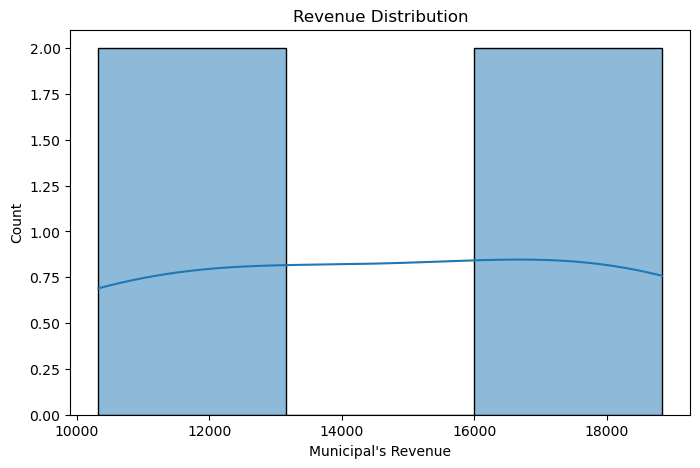

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

if "Municipal's Revenue" in pdf.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(pdf["Municipal's Revenue"], kde=True)
    plt.title("Revenue Distribution")
    plt.show()


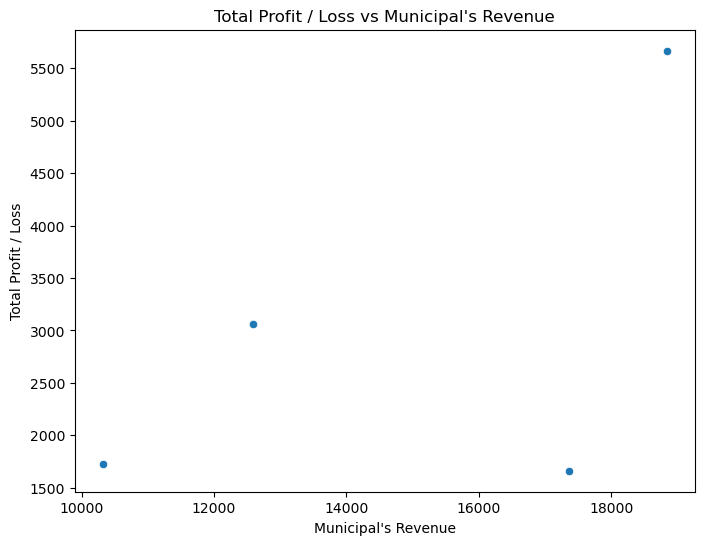

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots show inside Jupyter
%matplotlib inline  

# Use correct column names
if {"Total Profit / Loss", "Municipal's Revenue"}.issubset(pdf.columns):
    plt.figure(figsize=(8,6))
    sns.scatterplot(x="Municipal's Revenue", y="Total Profit / Loss", data=pdf)
    plt.title("Total Profit / Loss vs Municipal's Revenue")
    plt.xlabel("Municipal's Revenue")
    plt.ylabel("Total Profit / Loss")
    plt.show()


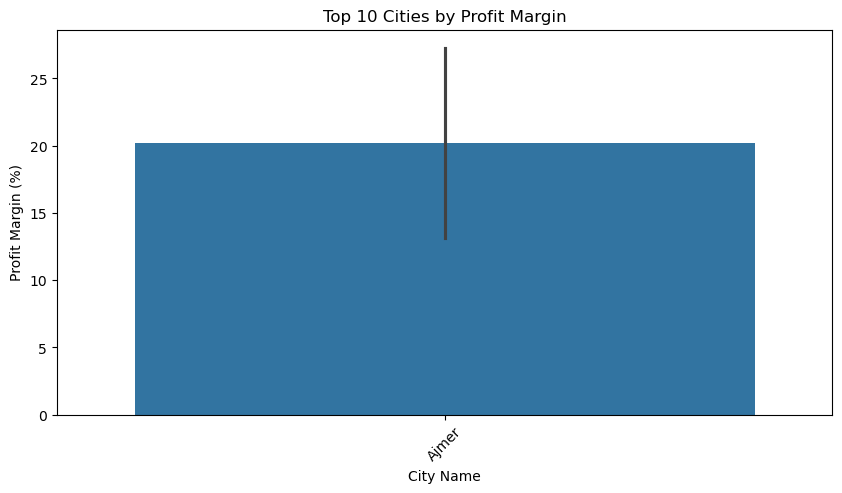

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure the Profit_Margin column exists (create it if needed)
# if "Profit_Margin" not in pdf.columns and \
#    {"Municipal's Revenue", "Total Profit / Loss"}.issubset(pdf.columns):
#     pdf["Municipal's Revenue"] = pd.to_numeric(pdf["Municipal's Revenue"], errors='coerce')
#     pdf["Total Profit / Loss"] = pd.to_numeric(pdf["Total Profit / Loss"], errors='coerce')
#     pdf["Profit_Margin"] = (pdf["Total Profit / Loss"] / pdf["Municipal's Revenue"]) * 100

# Plot the Top 10 Cities by Profit Margin
if {"City Name", "Profit_Margin"}.issubset(pdf.columns):
    top10 = pdf.sort_values("Profit_Margin", ascending=False).head(10)
    plt.figure(figsize=(10,5))
    sns.barplot(x="City Name", y="Profit_Margin", data=top10)
    plt.title("Top 10 Cities by Profit Margin")
    plt.xlabel("City Name")
    plt.ylabel("Profit Margin (%)")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("❌ Required columns not found. Available columns:", pdf.columns.tolist())


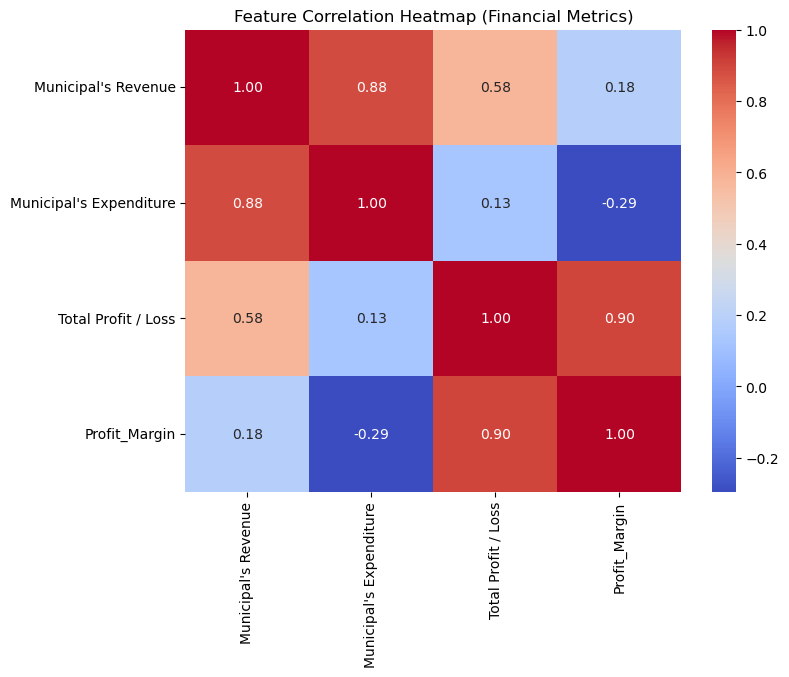

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert financial columns to numeric (if not already)
for col in ["Municipal's Revenue", "Municipal's Expenditure", "Total Profit / Loss"]:
    if col in pdf.columns:
        pdf[col] = pd.to_numeric(pdf[col], errors='coerce')

# Compute correlation only for numeric columns
numeric_df = pdf.select_dtypes(include=['float64', 'int64'])

# Check if there are numeric columns before plotting
if not numeric_df.empty:
    plt.figure(figsize=(8,6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Feature Correlation Heatmap (Financial Metrics)")
    plt.show()
else:
    print("❌ No numeric columns found for correlation heatmap.")


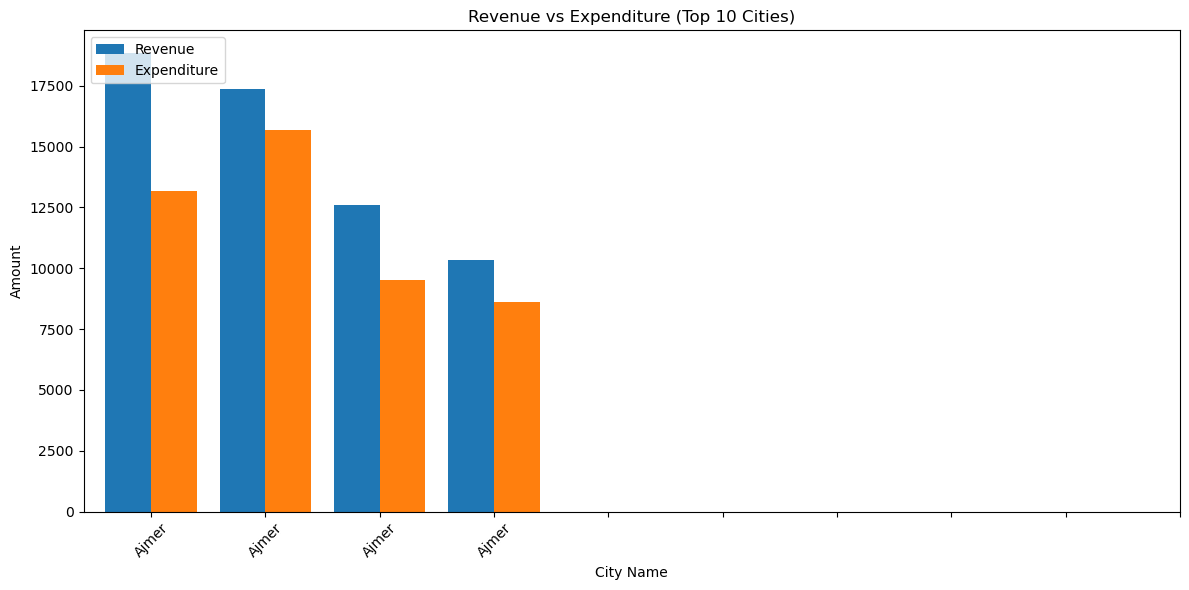

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

top_cities = pdf.sort_values("Municipal's Revenue", ascending=False).head(10)

plt.figure(figsize=(12,6))
bar_width = 0.4
x = range(len(top_cities))

plt.bar(x, top_cities["Municipal's Revenue"], width=bar_width, label="Revenue")
plt.bar([i + bar_width for i in x], top_cities["Municipal's Expenditure"], width=bar_width, label="Expenditure")

plt.xticks([i + bar_width/2 for i in x], top_cities["City Name"], rotation=45)
plt.xlabel("City Name")
plt.ylabel("Amount")
plt.title("Revenue vs Expenditure (Top 10 Cities)")
plt.legend()
plt.tight_layout()
plt.show()


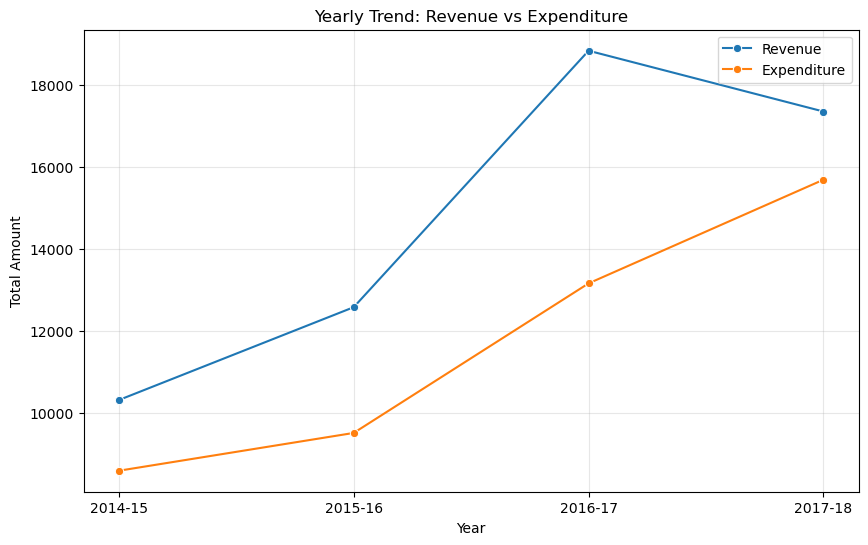

In [54]:
if "Year" in pdf.columns:
    yearly = pdf.groupby("Year")[["Municipal's Revenue", "Municipal's Expenditure"]].sum().reset_index()

    plt.figure(figsize=(10,6))
    sns.lineplot(x="Year", y="Municipal's Revenue", data=yearly, marker='o', label="Revenue")
    sns.lineplot(x="Year", y="Municipal's Expenditure", data=yearly, marker='o', label="Expenditure")
    plt.title("Yearly Trend: Revenue vs Expenditure")
    plt.xlabel("Year")
    plt.ylabel("Total Amount")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()


C:\Users\HOME\AppData\Local\Temp\ipykernel_37004\2197121833.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="City Name", x="Profit_Margin", data=top20, palette="viridis")


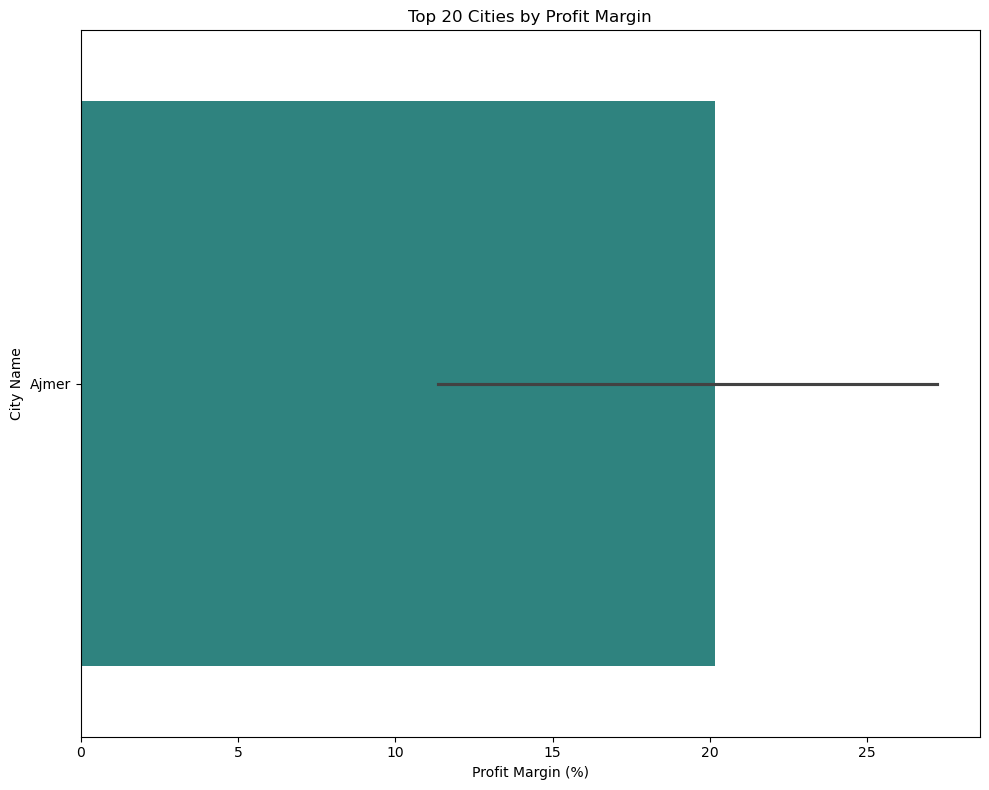

In [56]:
top20 = pdf.sort_values("Profit_Margin", ascending=False).head(20)

plt.figure(figsize=(10,8))
sns.barplot(y="City Name", x="Profit_Margin", data=top20, palette="viridis")
plt.title("Top 20 Cities by Profit Margin")
plt.xlabel("Profit Margin (%)")
plt.ylabel("City Name")
plt.tight_layout()
plt.show()


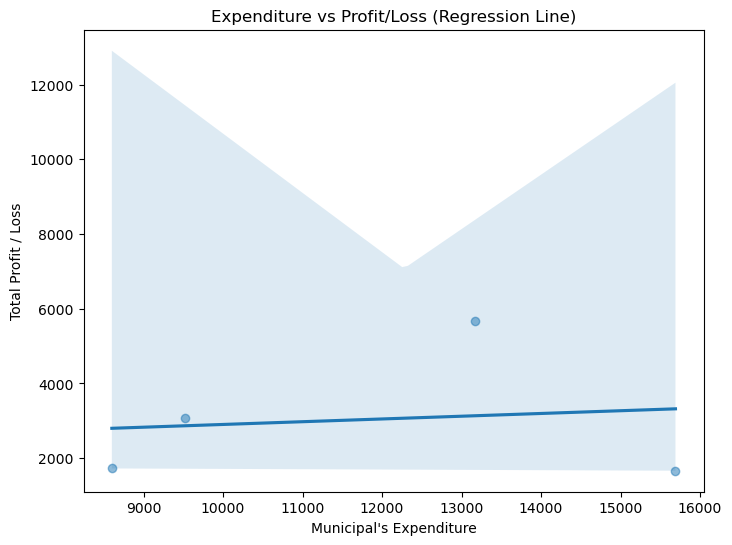

In [58]:
plt.figure(figsize=(8,6))
sns.regplot(x="Municipal's Expenditure", y="Total Profit / Loss", data=pdf, scatter_kws={'alpha':0.5})
plt.title("Expenditure vs Profit/Loss (Regression Line)")
plt.xlabel("Municipal's Expenditure")
plt.ylabel("Total Profit / Loss")
plt.show()


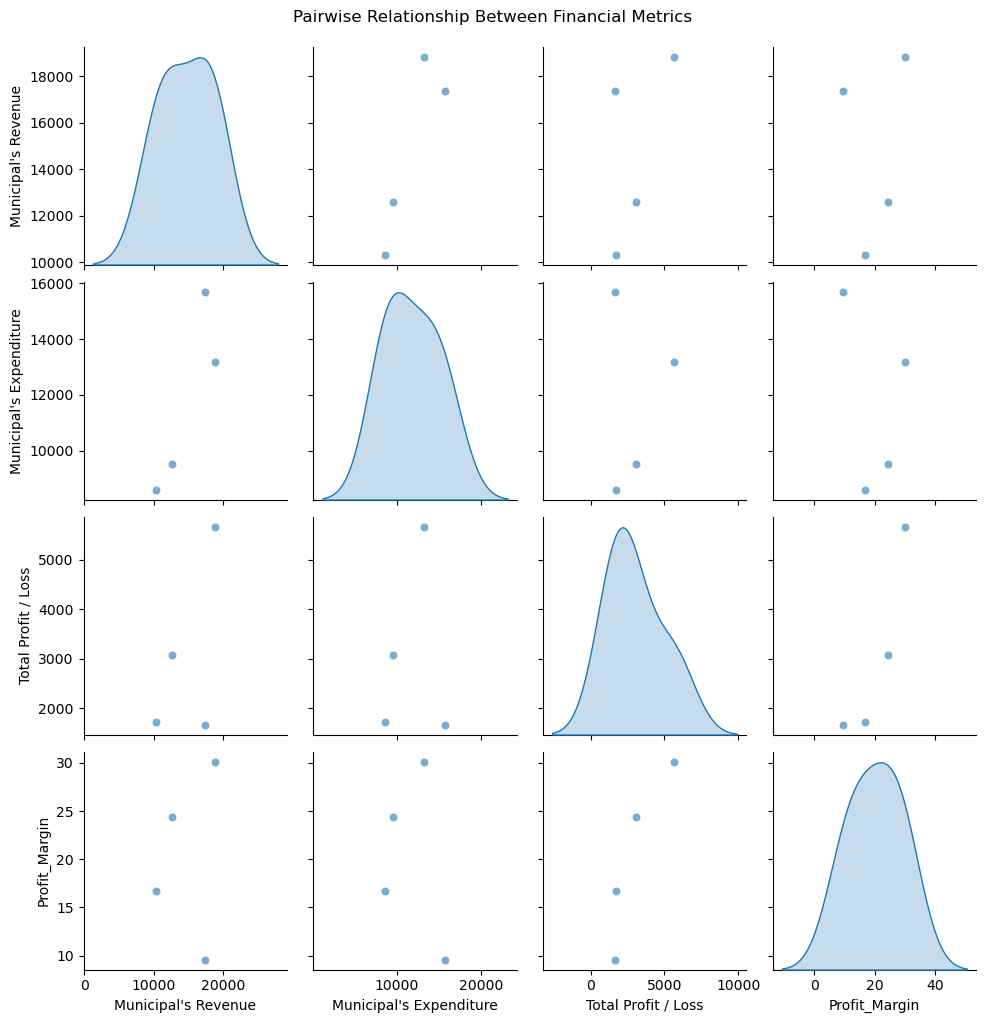

In [60]:
numeric_cols = ["Municipal's Revenue", "Municipal's Expenditure", "Total Profit / Loss", "Profit_Margin"]

sns.pairplot(pdf[numeric_cols].dropna(), diag_kind="kde", plot_kws={'alpha':0.6})
plt.suptitle("Pairwise Relationship Between Financial Metrics", y=1.02)
plt.show()


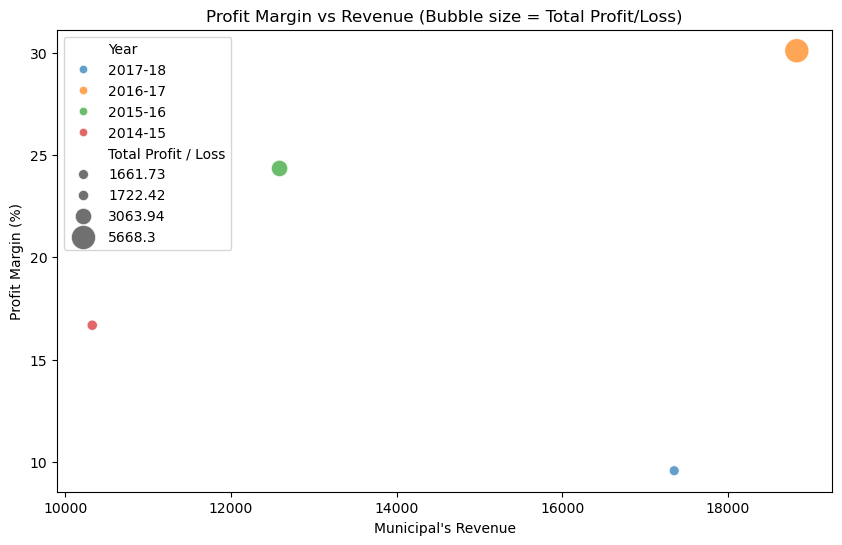

In [62]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="Municipal's Revenue",
    y="Profit_Margin",
    size="Total Profit / Loss",
    hue="Year" if "Year" in pdf.columns else None,
    data=pdf,
    alpha=0.7,
    sizes=(50, 300)
)
plt.title("Profit Margin vs Revenue (Bubble size = Total Profit/Loss)")
plt.xlabel("Municipal's Revenue")
plt.ylabel("Profit Margin (%)")
plt.show()
